# **Dataset 1 Notebook**



## Context


The provided dataset1 contains information on individuals, including their gender, minority status, and whether they live in deprived localities. We will run descriptive and inferential statistical analysis on this dataset.

### 0. Import Packages

**[0.1]** Import the necessary packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
import statsmodels.api as sm

**[0.2]** Suppress Warning Messages

In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### 1.   Load Dataset

In [5]:
file_url = 'https://raw.githubusercontent.com/SazzadSaran/FDS/main/dataset1.csv'

# load CSV data into a pandas dattaframe
df = pd.read_csv(file_url)

### 2. Explore Dataset

**[2.1]** Display first 5 rows of the dataset

In [6]:
df.head()

,ID,gender,minority,deprived
0,1087360,0,0,0
1,1088938,0,1,0
2,1088953,0,1,0
3,1088961,0,1,0
4,1089147,0,1,0


**[2.2]** Check dimensions of the dataframe

In [7]:
df.shape

(120115, 4)

There are 120115 rows and 4 columns in the dataset.

**[2.3]** Display the summary of the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120115 entries, 0 to 120114
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   ID        120115 non-null  int64
 1   gender    120115 non-null  int64
 2   minority  120115 non-null  int64
 3   deprived  120115 non-null  int64
dtypes: int64(4)
memory usage: 3.7 MB


### 3. Descriptive Statistical Analysis

In [9]:
df.describe()

,ID,gender,minority,deprived
count,1.201150e+05,120115.000000,120115.000000,120115.000000
mean,1.060058e+06,0.475819,0.240761,0.434800
std,3.467436e+04,0.499417,0.427547,0.495733
min,1.000001e+06,0.000000,0.000000,0.000000
25%,1.030030e+06,0.000000,0.000000,0.000000
50%,1.060058e+06,0.000000,0.000000,0.000000
75%,1.090086e+06,1.000000,0.000000,1.000000
max,1.120115e+06,1.000000,1.000000,1.000000


**[2.5]** Check missing values in each column

In [10]:
df.isnull().sum()

ID          0
gender      0
minority    0
deprived    0
dtype: int64

There is no missing value in the dataset

**[2.6]** Show distribution of values in 'gender' column

In [11]:
df['gender'].value_counts()

gender
0    62962
1    57153
Name: count, dtype: int64

**[2.7]** Show distribution of values in 'minority' column

In [12]:
df['minority'].value_counts()

minority
0    91196
1    28919
Name: count, dtype: int64

**[2.8]** Show distribution of values in 'deprived' column

In [13]:
df['deprived'].value_counts()

deprived
0    67889
1    52226
Name: count, dtype: int64

**[2.9]** Show the distribution of different variables in barplots

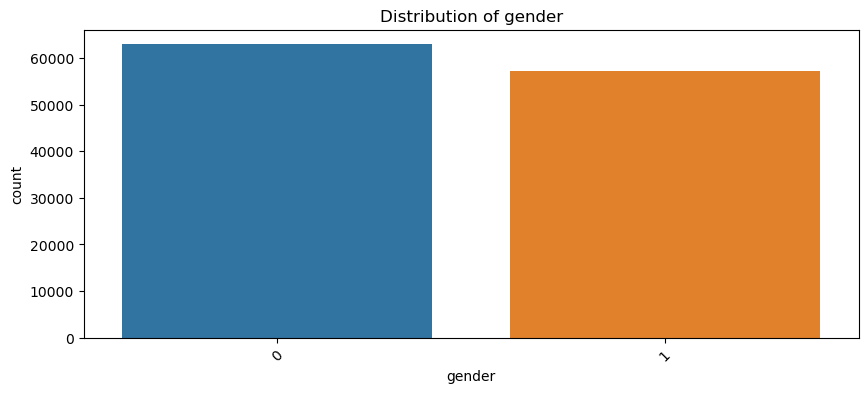

Ratio of the values in gender:
gender
0    0.524181
1    0.475819
Name: proportion, dtype: float64




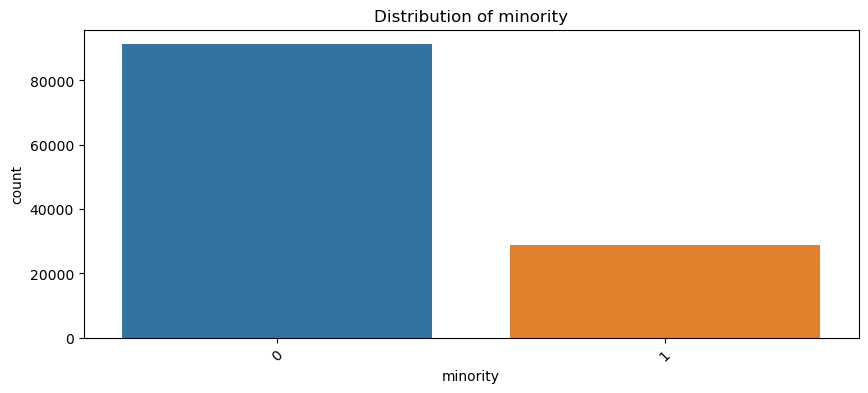

Ratio of the values in minority:
minority
0    0.759239
1    0.240761
Name: proportion, dtype: float64




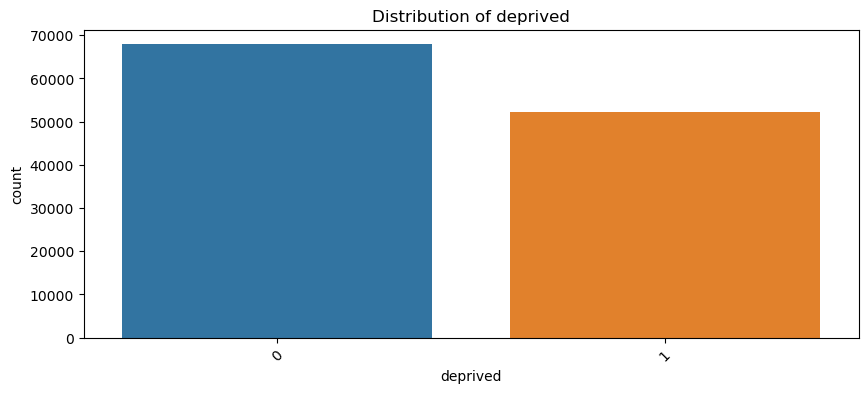

Ratio of the values in deprived:
deprived
0    0.5652
1    0.4348
Name: proportion, dtype: float64




In [14]:
relevant_cols = ['gender', 'minority', 'deprived']

# Loop to plot the distribution and ratio of values
for col in relevant_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

    # Print ratio of the values in the column (normalized counts)
    print(f'Ratio of the values in {col}:')
    print(df[col].value_counts(normalize=True))
    print('\n')

**[2.10]** Show the percentage values of different categories between two variables

In [15]:
male_majority_group = df[(df['gender'] == 1) & (df['minority'] == 0)] 
# Calculate the total number of male respondents 
total_male = df[df['gender'] == 1].shape[0] 
# Calculate the percentage of male respondents belonging to the majority ethnic group 
percentage_male_majority_group = (male_majority_group.shape[0] / total_male) * 100 

print("Percentage of male belongs to the majority ethical group: ",percentage_male_majority_group)
print("Percentage of male not belongs to the majority ethical group: ",100-percentage_male_majority_group)

Percentage of male belongs to the majority ethical group:  76.64514548667611
Percentage of male not belongs to the majority ethical group:  23.354854513323886


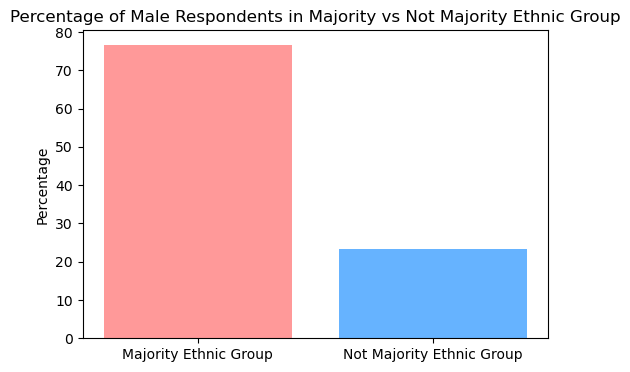

In [26]:
# Sample data to simulate the situation
data = {
    'gender': [1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
    'minority': [0, 1, 0, 0, 1, 1, 0, 1, 0, 0]
}

df = pd.DataFrame(data)

# Filtering the male majority group
male_majority_group = df[(df['gender'] == 1) & (df['minority'] == 0)]

# Calculate the total number of male respondents
total_male = df[df['gender'] == 1].shape[0]

# Calculate the percentage of male respondents belonging to the majority ethnic group
percentage_male_majority_group = 76.64514548667611
percentage_male_not_majority_group = 100 - percentage_male_majority_group

# Data for the bar chart
categories = ['Majority Ethnic Group', 'Not Majority Ethnic Group']
percentages = [percentage_male_majority_group, percentage_male_not_majority_group]

# Plotting the bar chart
plt.figure(figsize=(6,4))
plt.bar(categories, percentages, color=['#ff9999', '#66b3ff'])

# Adding title and labels
plt.title('Percentage of Male Respondents in Majority vs Not Majority Ethnic Group')
plt.ylabel('Percentage')
plt.show()



In [16]:
male_deprived_group = df[(df['gender'] == 1) & (df['deprived'] == 1)] 
# Calculate the total number of male respondents 
total_male = df[df['gender'] == 1].shape[0] 
# Calculate the percentage of male respondents residing in localities with high deprivation indices 
percentage_male_deprived_group = (male_deprived_group.shape[0] / total_male) * 100 

print("Percentage of male residing in localities with high deprivation indices: ",percentage_male_deprived_group)
print("Percentage of male residing outside localities with high deprivation indices: ",100-percentage_male_deprived_group)

Percentage of male residing in localities with high deprivation indices:  42.55594631952828
Percentage of male residing outside localities with high deprivation indices:  57.44405368047172


In [17]:
others_majority_group = df[(df['gender'] == 0) & (df['minority'] == 0)] 
# Calculate the total number of others respondents 
total_others = df[df['gender'] == 0].shape[0] 
# Calculate the percentage of others respondents belonging to the majority ethnic group 
percentage_others_majority_group = (others_majority_group.shape[0] / total_others) * 100 

print("Percentage of others belong to the majority ethical group: ",percentage_others_majority_group)
print("Percentage of others not belong to the majority ethical group: ",100-percentage_others_majority_group)

Percentage of others belong to the majority ethical group:  75.26920999968235
Percentage of others not belong to the majority ethical group:  24.730790000317654


In [18]:
others_deprived_group = df[(df['gender'] == 0) & (df['deprived'] == 1)] 
# Calculate the total number of others respondents 
total_others = df[df['gender'] == 0].shape[0] 
# Calculate the percentage of others respondents residing in localities with high deprivation indices 
percentage_others_deprived_group = (male_deprived_group.shape[0] / total_male) * 100 

print("Percentage of others residing in localities with high deprivation indices: ",percentage_others_deprived_group)
print("Percentage of others residing outside localities with high deprivation indices: ",100-percentage_others_deprived_group)

Percentage of others residing in localities with high deprivation indices:  42.55594631952828
Percentage of others residing outside localities with high deprivation indices:  57.44405368047172


In [19]:
major_deprived_group = df[(df['minority'] == 0) & (df['deprived'] == 1)] 
# Calculate the total number of respondents of the majority 
total_major = df[df['minority'] == 0].shape[0] 
# Calculate the percentage of majority respondents residing in localities with high deprivation indices 
percentage_major_deprived_group = (major_deprived_group.shape[0] / total_major) * 100 

print("Percentage of majority residing in localities with high deprivation indices: ",percentage_male_deprived_group)
print("Percentage of majority residing outside localities with high deprivation indices: ",100-percentage_male_deprived_group)

Percentage of majority residing in localities with high deprivation indices:  42.55594631952828
Percentage of majority residing outside localities with high deprivation indices:  57.44405368047172


In [20]:
minor_deprived_group = df[(df['minority'] == 1) & (df['deprived'] == 1)] 
# Calculate the total number of respondents of the minority
total_minor = df[df['minority'] == 1].shape[0] 
# Calculate the percentage of minor respondents residing in localities with high deprivation indices 
percentage_minor_deprived_group = (minor_deprived_group.shape[0] / total_minor) * 100 

print("Percentage of minor residing in localities with high deprivation indices: ",percentage_minor_deprived_group)
print("Percentage of minor residing outside localities with high deprivation indices: ",100-percentage_minor_deprived_group)

Percentage of minor residing in localities with high deprivation indices:  64.7947716034441
Percentage of minor residing outside localities with high deprivation indices:  35.205228396555896


### We want to find out what percentage of 'male' and 'others' populations in the dataset who belong to the minority group (i.e., not belonging to the majority ethnic group) live in localities with high deprivation indices.

In [21]:
# Filter the dataset for male respondents (gender == 1), minority group (minority == 1), and high deprivation areas (deprived == 1) 
male_minority_deprived = df[(df['gender'] == 1) & (df['minority'] == 1) & (df['deprived'] == 1)] 
# Calculate the total number of male respondents in the minority group 
total_male_minority = df[(df['gender'] == 1) & (df['minority'] == 1)].shape[0] 
# Calculate the percentage of male respondents in the minority group who live in deprived localities
percentage_male_minority_deprived = (male_minority_deprived.shape[0] / total_male_minority) * 100 
# Print the percentage 
print(percentage_male_minority_deprived,"% male minors lives in high-deprivation localities")


# Filter the dataset for others respondents (gender == 0), minority group (minority == 1), and high deprivation areas (deprived == 1) 
others_minority_deprived = df[(df['gender'] == 0) & (df['minority'] == 1) & (df['deprived'] == 1)] 
# Calculate the total number of others respondents in the minority group 
total_others_minority = df[(df['gender'] == 0) & (df['minority'] == 1)].shape[0] 
# Calculate the percentage of male respondents in the minority group who live in deprived localities
percentage_others_minority_deprived = (others_minority_deprived.shape[0] / total_others_minority) * 100 
# Print the percentage 
print(percentage_others_minority_deprived,"% others minors lives in high-deprivation localities")

64.17440815103387 % male minors lives in high-deprivation localities
65.3265686211547 % others minors lives in high-deprivation localities


#### We can see that almost two-thirds of male (64.17%) who do not belong to the majority ethical group (minors) live in high-deprivation localities.

### 3. First Inferential Statistical Analysis

We will experiment with a chi-square test with the hypothesis:

**Null Hypothesis (H₀):**
There is no association between gender and minority status. In other words, gender and minority status are independent of each other.

**Alternative Hypothesis (H₁):**
There is an association between gender and minority status. In other words, gender and minority status are not independent.

In [23]:
## Chi-Square Test

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['minority'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 30.952637325227045
P-value: 2.6440254824826455e-08
Degrees of Freedom: 1
Expected Frequencies: 
[[47803.20985722 15158.79014278]
 [43392.79014278 13760.20985722]]


Since the p-value (2.64e-08) is much smaller than the significance level of 0.05, we reject the null hypothesis.
And conclude that,
there is no strong evidence to retain the null, meaning gender and minority status are not independent, meaning there is a statistically significant association between these two variables.


### 4. Second Inferential Statistical Analysis

We will experiment with two-proportion Z-test with the hypothesis:

**Null Hypothesis (H₀):**
The proportion of males living in deprived localities is equal to the proportion of females living in deprived localities. In other words, there is no difference between the proportions of males and females living in deprived areas.

p_male = p_female

**Alternative Hypothesis (H₁)**
The proportion of males living in deprived localities is not equal to the proportion of females living in deprived localities. This means that there is a difference between the proportions of males and females living in deprived areas.

p_male ≠ p_female

In [25]:
## A two-proportion Z test
import statsmodels.api as sm

# Number of males and others living in deprived localities
male_deprived = df[(df['gender'] == 1) & (df['deprived'] == 1)].shape[0]
others_deprived = df[(df['gender'] == 0) & (df['deprived'] == 1)].shape[0]

# Total number of males and others in the dataset
total_males = df[df['gender'] == 1].shape[0]
total_others = df[df['gender'] == 0].shape[0]

# Proportion of males and others in deprived localities
prop_male_deprived = male_deprived / total_males
prop_others_deprived = others_deprived / total_females

# Number of successes (i.e., living in deprived localities) and total population for the two groups
count = np.array([male_deprived, others_deprived])
nobs = np.array([total_males, total_others])

# Perform the two-proportion z-test
z_stat, p_value = sm.stats.proportions_ztest(count, nobs)

# Display the results
print(f"Z-Statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-Statistic: -6.155019843063043
P-value: 7.506809593031805e-10


Since the p-value (7.51e-10) is much smaller than the significance level (α = 0.05), we reject the null hypothesis.
And conclude that,
there is not enough evidence to retain the null, meaning there is a statistically significant difference between the proportion of males and others living in deprived localities.